# Natural Language Processing	
1.Using NLP predict whether the review is positive or negative for a given dataset 


In [1]:
# Natural Language Processing
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pickle
import os
import nltk

# cleaning the text
import re
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

# precision recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset

dataset = pd.read_csv("Dataset/Restaurant_Reviews.tsv",delimiter = "\t",quoting= 3)

In [3]:
print("dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1]))

dataset has 1000 rows and 2 Columns


In [4]:
# checking the head of the data

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# cleaning the text
nltk.download('stopwords')
review = re.sub('[^a-zA-Z]',' ',dataset['Review'][0])
review = review.lower()
review = review.split()
review = [w for w in review if w not in stopwords.words("english")]

[nltk_data] Downloading package stopwords to /home/admin1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print("Before Stemming review",review)

Before Stemming review ['wow', 'loved', 'place']


# Stemming

"Stemming is the process of reducing inflection in words to their root forms 
such as mapping a group of words to the same stem even if the stem itself is not a 
valid word in the Language."

Stem (root) is the part of the word to which you add inflectional (changing/deriving) affixes 
such as (-ed,-ize, -s,-de,mis). So stemming a word or sentence may result in words that are not actual words.
Stems are created by removing the suffixes or prefixes used with a word.

In [7]:
ps = PorterStemmer()
review = [ps.stem(w) for w in review if w not in stopwords.words("english")]


In [8]:
print("After steamming review",review)

After steamming review ['wow', 'love', 'place']


In [9]:
review = ' '.join(review)
review

'wow love place'

In [10]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [w for w in review if w not in stopwords.words("english")]
    ps = PorterStemmer()
    review = [ps.stem(w) for w in review if w not in stopwords.words("english")]
    review = ' '.join(review)
    corpus.append(review)


#### Bag Of Words Model:

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.

In [11]:
# creating bag of words model

cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [12]:
x.shape,y.shape

((1000, 1500), (1000,))

In [13]:
x.shape, y.shape
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [14]:
frames = [x,y]
dataset_1 = pd.concat(frames)

In [15]:
dataset_1.shape

(2000, 1500)

## Fitting Naive Bayes to the Training set


 confusion matrix 
 [[340  63]
 [  0 397]]

 Accuracy: average_precision_score : 86.30434782608695
Accuracy: accuracy_score :
 92.125

 Accuracy: average_precision_score : 86.30434782608695

               precision    recall  f1-score   support

           0       1.00      0.84      0.92       403
           1       0.86      1.00      0.93       397

   micro avg       0.92      0.92      0.92       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.92      0.92       800


 ROC curve 



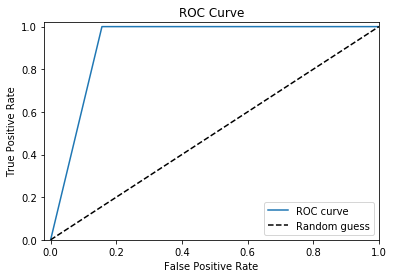

In [16]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_train)

# Making the Confusion Matrix

cm = confusion_matrix(y_train, y_pred)
print("\n confusion matrix \n",cm)

accuracy = average_precision_score(y_train, y_pred)* 100
print("\n Accuracy: average_precision_score :", accuracy)

Accuracy = accuracy_score(y_train, y_pred)*100
print("Accuracy: accuracy_score :\n", Accuracy)
        
accuracy = average_precision_score(y_train, y_pred)* 100
print("\n Accuracy: average_precision_score :", accuracy)


print("\n",classification_report(y_train, y_pred))

y_pred_prob = classifier.predict_proba(X_train)[:,1]

print("\n ROC curve \n")
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")


save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

### Prediction on test dataset

confusion matrix 
  [[54 43]
 [16 87]]
Accuracy: accuracy_score : 70.5
Accuracy: average_precision_score : 64.52725914861837

               precision    recall  f1-score   support

           0       0.77      0.56      0.65        97
           1       0.67      0.84      0.75       103

   micro avg       0.70      0.70      0.70       200
   macro avg       0.72      0.70      0.70       200
weighted avg       0.72      0.70      0.70       200



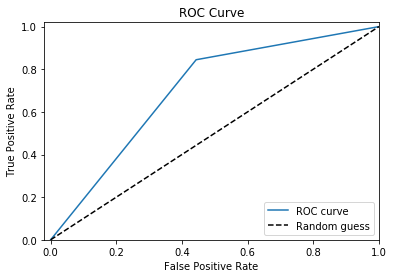

In [17]:
# dump train model pickle file
file = open('naivebayes.pickle', 'rb')
pickle_in = pickle.load(file)

# Predicting the Test set results
y_pred = pickle_in.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cm)


Accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: accuracy_score :", Accuracy)
        
accuracy = average_precision_score(y_test, y_pred)* 100
print("Accuracy: average_precision_score :", accuracy)

print("\n",classification_report(y_test, y_pred))

y_pred_prob = pickle_in.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")